In [1]:
from protein_sequence import ProteinSequence
from mutation_strategy import MutationStrategy, MinLogitPosSub, BlosumWeightedSub
from evolution import Evolution
from evaluation_strategy import EvaluationStrategy
from model_singleton import ModelSingleton
import esm
from Bio.Align import substitution_matrices

In [2]:
# Source: https://github.com/facebookresearch/esm/tree/main?tab=readme-ov-file#esmfold
model, alphabet = esm.pretrained.load_model_and_alphabet("esm2_t33_650M_UR50D") 
batch_converter = alphabet.get_batch_converter()
blosum80 = substitution_matrices.load("BLOSUM80")

In [3]:
reference_seq = 'TTSAGESADPVTATVENYGGETQVQRRQHTDIAFILDRFVKVKPKEQVNVLDLMQIPAHTLVGALLRTATYYFSDLELAVKHEGDLTWVPNGAPETALDNTTNPTAYHKEPLTRLALPYTAPHRVLATVYNGSSKYGDTSTNNVRGDLQVLAQKAERTLPTSFNFGAIKATRVTELLYRMKRAETYCPRPLLAIQPSDARHKQRIVAPAKQ'
# use real data now to be able to compare

In [4]:
modelSingleton = ModelSingleton(model=model,alphabet=alphabet,batch_converter=batch_converter)

In [5]:
fmd_sequence = ProteinSequence("base",reference_seq)
eval_strat = EvaluationStrategy(root_sequence = fmd_sequence)
mutation_strat = MinLogitPosSub(mutations_per_seq=5,start_pos=0,end_pos=210)
evolution = Evolution(
    root_sequence = fmd_sequence,
    mutation_strategy = mutation_strat,
    evaluation_strategy = eval_strat,
    max_generations=5)

In [6]:
evolution.evolve_sequence()  # stops evolving as probability stops increasing (functionality)

[(17, 'P'), (17, 'A'), (17, 'T'), (17, 'V'), (17, 'S')]
[(109, 'A'), (109, 'Q'), (109, 'S'), (109, 'G'), (109, 'F')]
[(77, 'I'), (77, 'V'), (77, 'M'), (77, 'F'), (77, 'A')]
Stop evolving
[(77, 'I'), (77, 'V'), (77, 'M'), (77, 'F'), (77, 'A')]
Stop evolving
[(77, 'I'), (77, 'V'), (77, 'M'), (77, 'F'), (77, 'A')]
Stop evolving
[(77, 'I'), (77, 'V'), (77, 'M'), (77, 'F'), (77, 'A')]
Stop evolving
Stop evolving
[(109, 'A'), (109, 'Q'), (109, 'S'), (109, 'G'), (109, 'F')]
Stop evolving
[(109, 'A'), (109, 'Q'), (109, 'S'), (109, 'G'), (109, 'F')]
Stop evolving
[(109, 'A'), (109, 'Q'), (109, 'S'), (109, 'G'), (109, 'Y')]
Stop evolving
[(109, 'A'), (109, 'Q'), (109, 'S'), (109, 'G'), (109, 'F')]
Stop evolving
Stop evolving


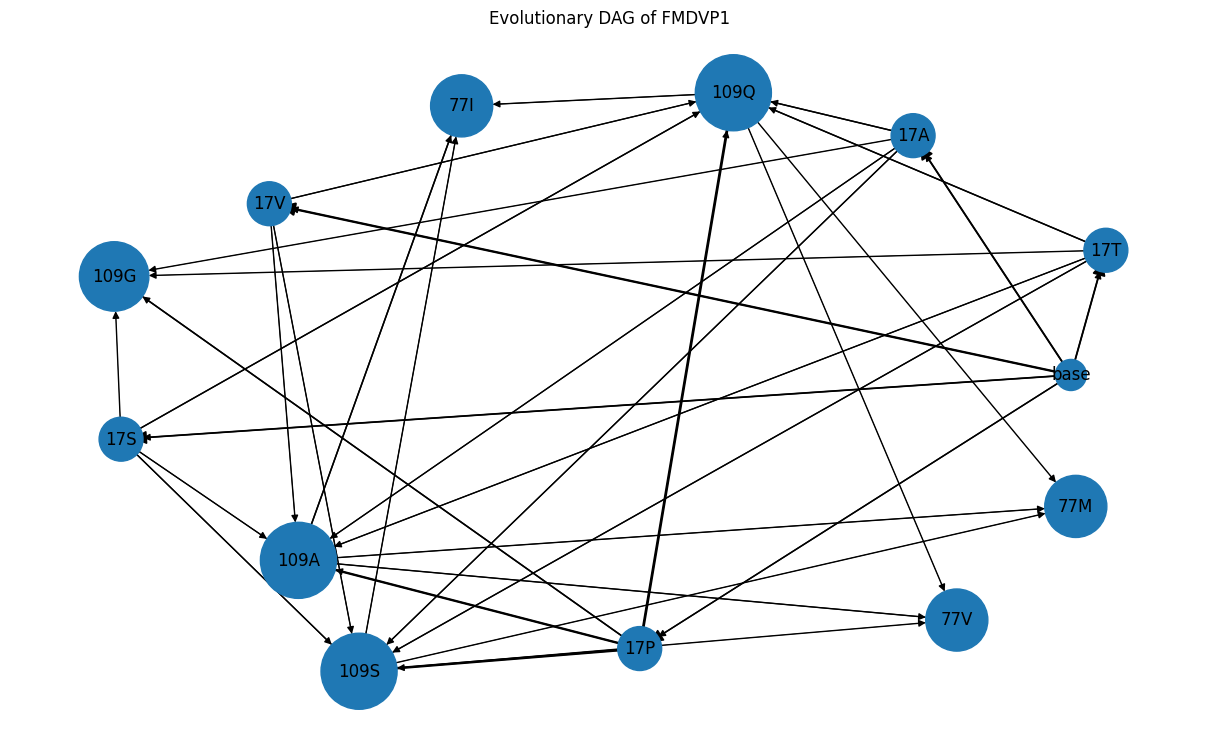

In [7]:
evolution.visualise_evolution_G() # new

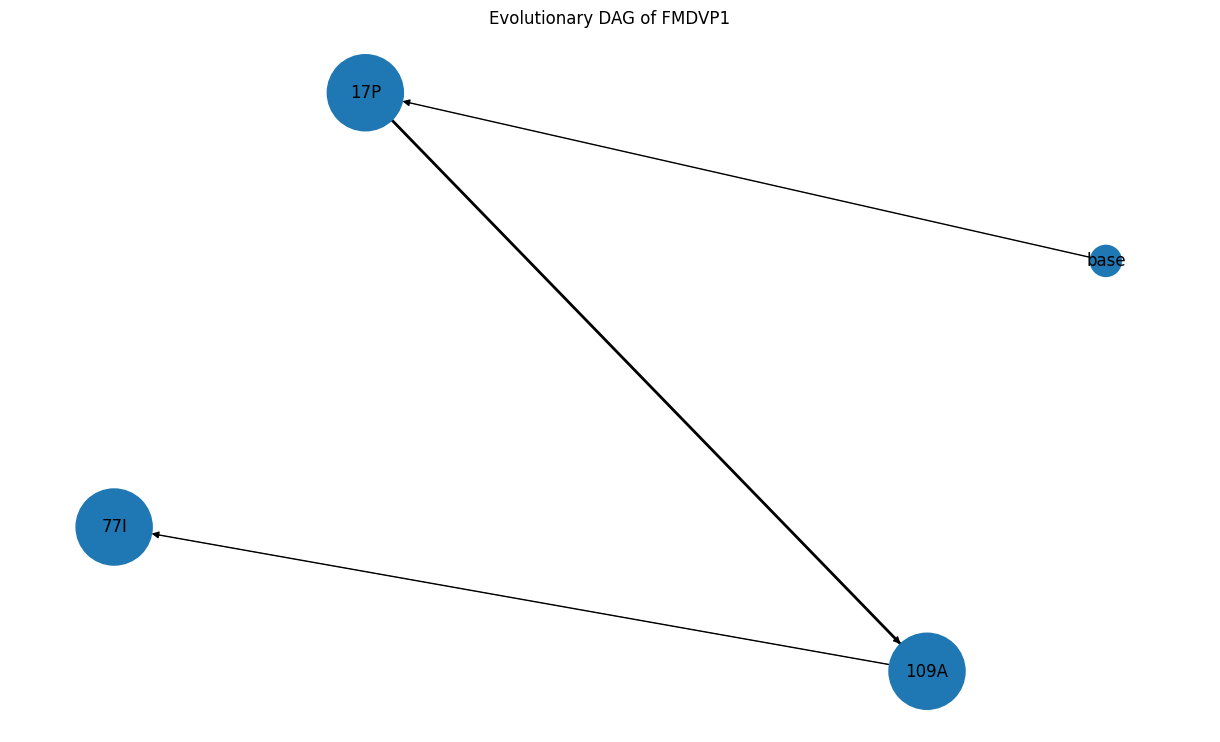

['base', '17P', '109A', '77I']

In [8]:
evolution.get_path_with_highest_mutation_score() 
# improve evaluation and leave it to filter out potential mutations rather than hardsetting, accept/reject policy, 
# what if i generate 100 different paths, what's the most likely paths that come up? rank these paths, want a population of possible paths  
# use alignments to assess closeness to actual path - ways to evaluate this and quantify the difference 

In [9]:
fmd_sequence = ProteinSequence("base",reference_seq)
eval_strat = EvaluationStrategy(root_sequence=fmd_sequence)
mutation_strat = MinLogitPosSub(mutations_per_seq=5,start_pos=138,end_pos=143)
evolution = Evolution(
    root_sequence = fmd_sequence,
    mutation_strategy = mutation_strat,
    evaluation_strategy = eval_strat,current_seq
    max_generations=5)

In [10]:
evolution.evolve_sequence() 

[(139, 'K'), (139, 'R'), (139, 'Q'), (139, 'A'), (139, 'T')]
[(141, 'T'), (141, 'S'), (141, 'A'), (141, 'G'), (141, 'D')]
[(140, 'V'), (140, 'A'), (140, 'E'), (140, 'L'), (140, 'I')]
Stop evolving
Stop evolving
[(140, 'E'), (140, 'A'), (140, 'V'), (140, 'D'), (140, 'Q')]
Stop evolving
[(140, 'V'), (140, 'A'), (140, 'I'), (140, 'K'), (140, 'E')]
Stop evolving
[(139, 'Q'), (139, 'R'), (139, 'K'), (139, 'P'), (139, 'T')]
[(140, 'V'), (140, 'A'), (140, 'I'), (140, 'K'), (140, 'E')]
Stop evolving
[(139, 'R'), (139, 'K'), (139, 'Q'), (139, 'A'), (139, 'P')]
[(140, 'V'), (140, 'A'), (140, 'I'), (140, 'K'), (140, 'E')]
Stop evolving
Stop evolving
Stop evolving
[(139, 'R'), (139, 'K'), (139, 'Q'), (139, 'A'), (139, 'P')]
Stop evolving
Stop evolving


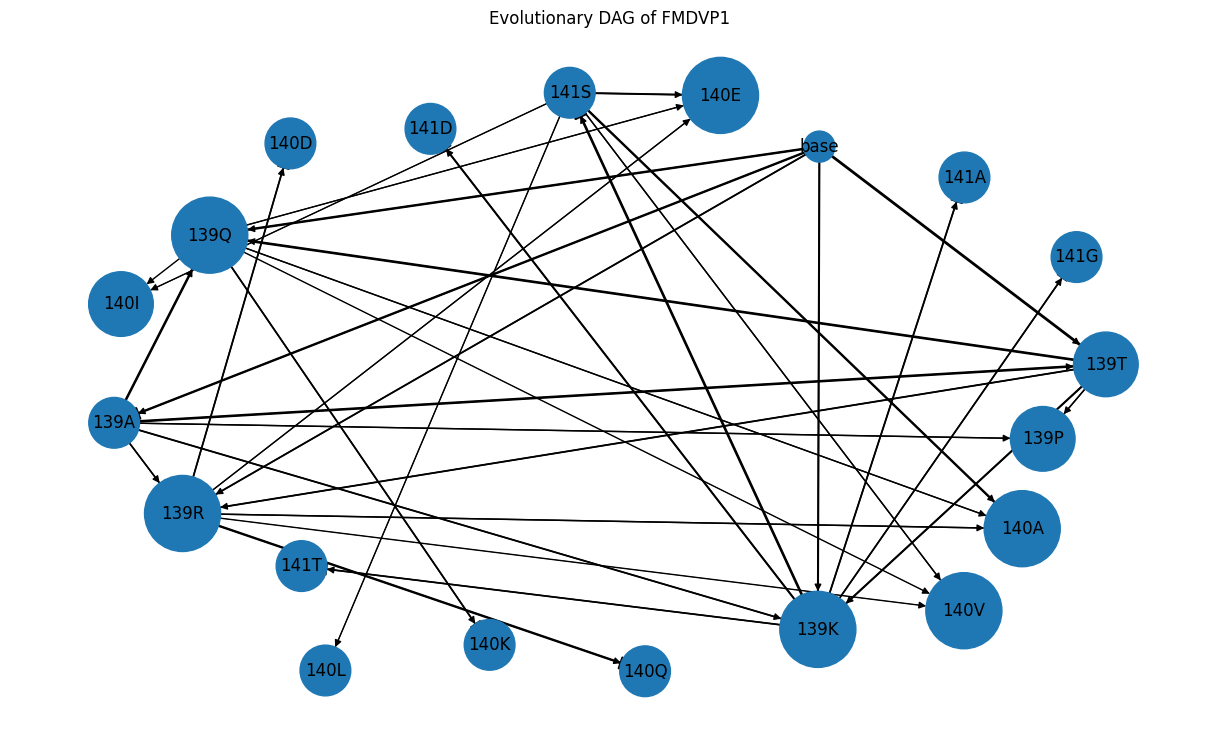

In [11]:
evolution.visualise_evolution_G()

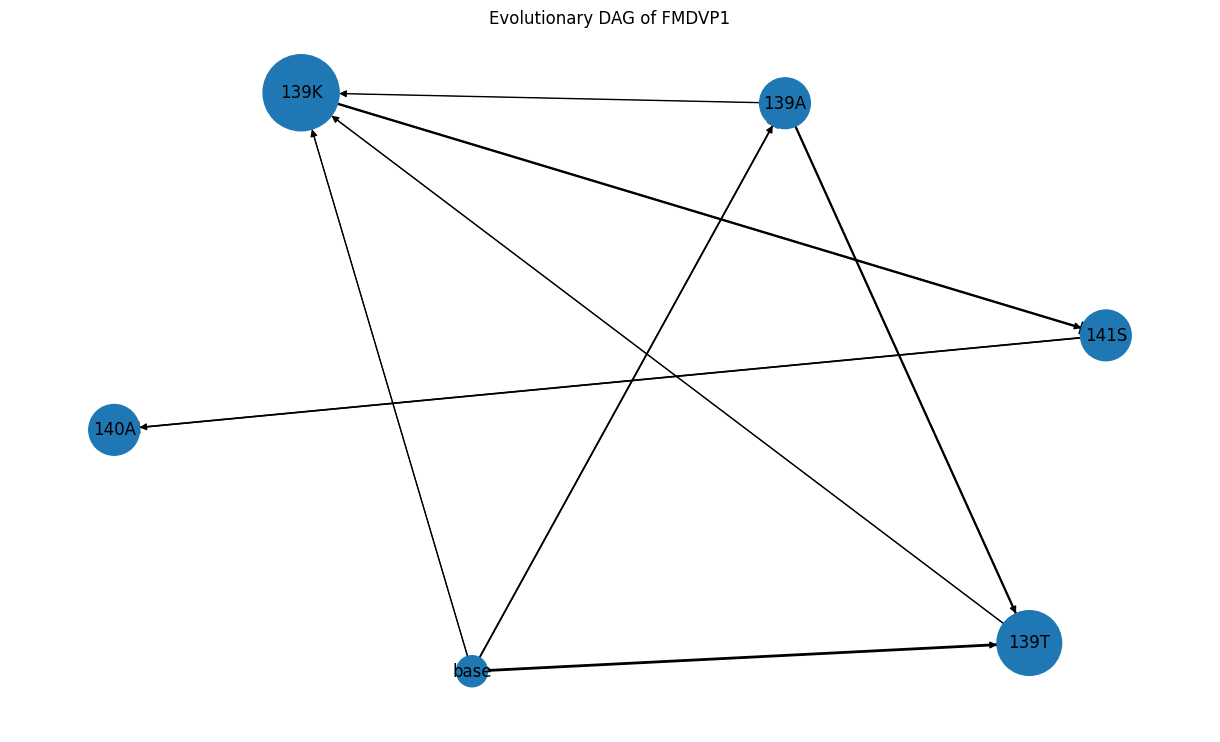

['base', '139A', '139T', '139K', '141S', '140A']

In [12]:
evolution.get_path_with_highest_mutation_score()

In [13]:
fmd_sequence = ProteinSequence("base",reference_seq)
eval_strat = EvaluationStrategy(root_sequence=fmd_sequence)
mutation_strat = BlosumWeightedSub(blosum_matrix=blosum80,multiplier=0.5,mutations_per_seq=5,start_pos=0,end_pos=210)
evolution = Evolution(
    root_sequence = fmd_sequence,
    mutation_strategy = mutation_strat,
    evaluation_strategy = eval_strat,
    max_generations=5)

In [14]:
evolution.evolve_sequence()   

[(17, 'F'), (17, 'H'), (17, 'W'), (17, 'L'), (17, 'T')]
[(109, 'Q'), (109, 'D'), (109, 'K'), (109, 'H'), (109, 'S')]
Stop evolving
[(109, 'Q'), (109, 'D'), (109, 'K'), (109, 'H'), (109, 'S')]
Stop evolving
[(109, 'Q'), (109, 'D'), (109, 'K'), (109, 'H'), (109, 'S')]
Stop evolving
[(109, 'Q'), (109, 'D'), (109, 'K'), (109, 'H'), (109, 'S')]
Stop evolving
Stop evolving


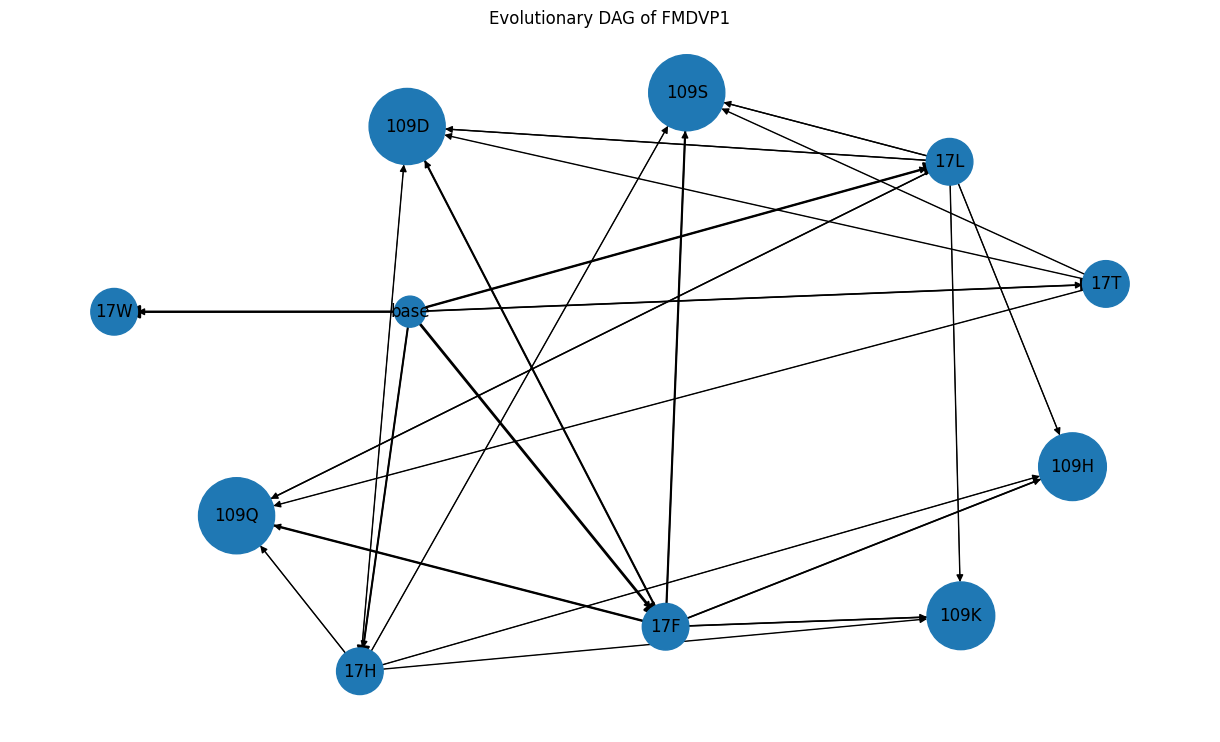

In [15]:
evolution.visualise_evolution_G() # new 

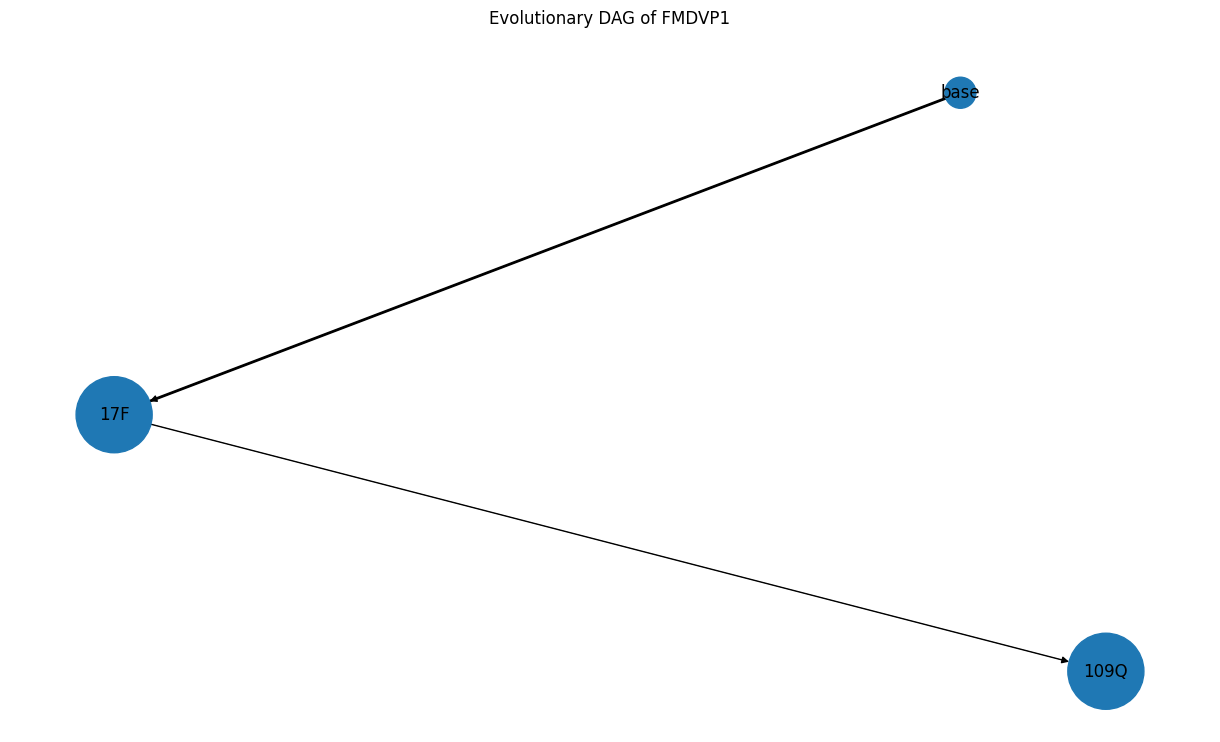

['base', '17F', '109Q']

In [16]:
evolution.get_path_with_highest_mutation_score()

In [18]:
fmd_sequence = ProteinSequence("base",reference_seq)
eval_strat = EvaluationStrategy(root_sequence=fmd_sequence)
mutation_strat = BlosumWeightedSub(blosum_matrix=blosum80,multiplier=0.5,mutations_per_seq=5,start_pos=138,end_pos=142)
evolution = Evolution(
    root_sequence = fmd_sequence,
    mutation_strategy = mutation_strat,
    evaluation_strategy = eval_strat,
    max_generations=5)

In [19]:
evolution.evolve_sequence()   

[(139, 'A'), (139, 'T'), (139, 'N'), (139, 'K'), (139, 'Q')]
[(139, 'S'), (139, 'T'), (139, 'G'), (139, 'K'), (139, 'P')]
[(139, 'S'), (139, 'A'), (139, 'N'), (139, 'V'), (139, 'K')]
Stop evolving
Stop evolving
[(139, 'S'), (139, 'A'), (139, 'N'), (139, 'V'), (139, 'K')]
Stop evolving
[(139, 'D'), (139, 'S'), (139, 'H'), (139, 'K'), (139, 'Q')]
Stop evolving
[(141, 'D'), (141, 'S'), (141, 'H'), (141, 'T'), (141, 'Q')]
[(140, 'S'), (140, 'V'), (140, 'A'), (140, 'N'), (140, 'Q')]
Stop evolving
Stop evolving
[(140, 'S'), (140, 'V'), (140, 'A'), (140, 'N'), (140, 'K')]
Stop evolving
Stop evolving


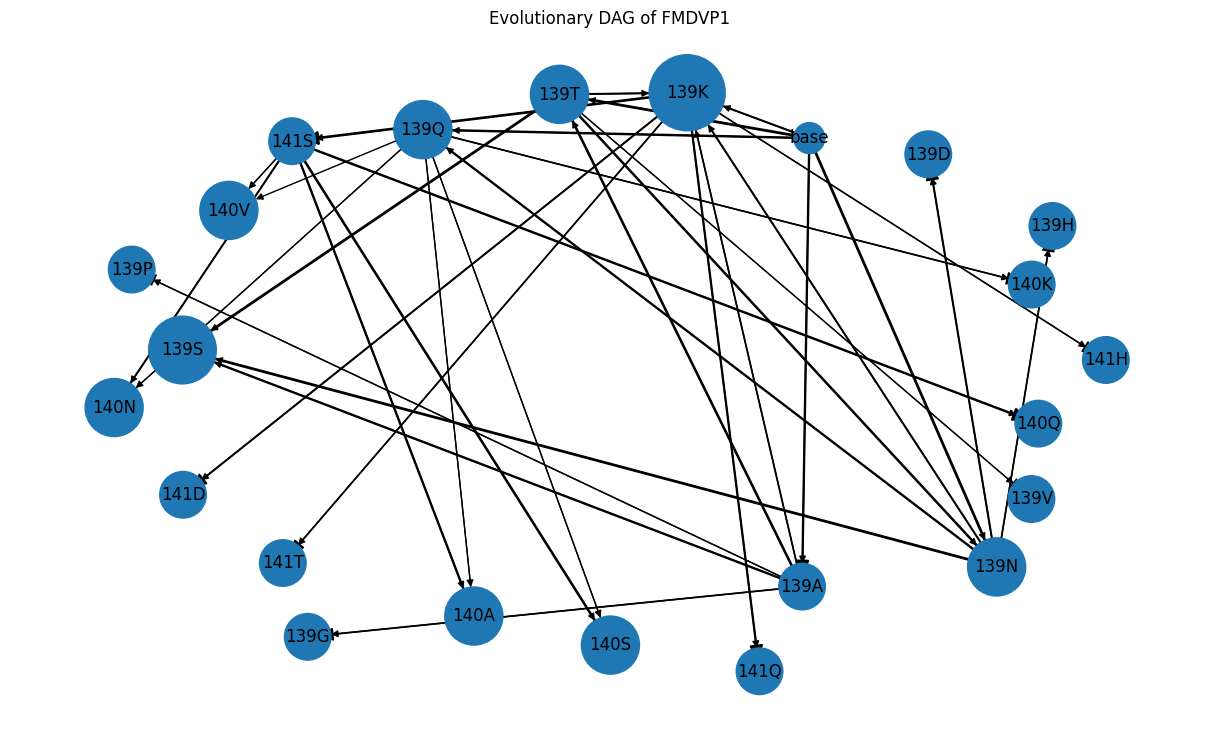

In [20]:
evolution.visualise_evolution_G()

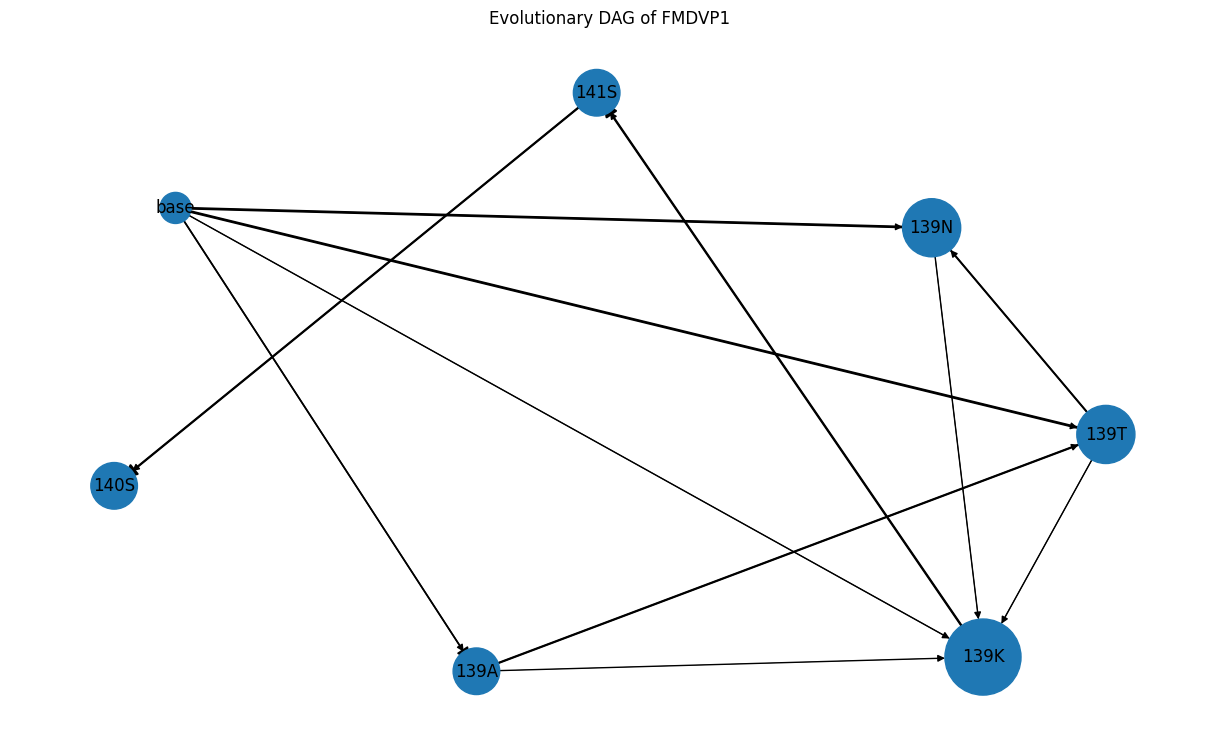

['base', '139A', '139T', '139N', '139K', '141S', '140S']

In [21]:
evolution.get_path_with_highest_mutation_score()

In [ ]:
# experiment observation: constraining positions for mutation increases length of evolution path  
# this is not surprising as mutating the position least favoured by the PLM != mutating the position that will yield an increase in sequence probability 
# replacing the current amino acid at the lowest logit position does not automatically increase the sequence probability 
# this is because it may choose a position where mutations are unlikely to happen at to begin  with (ie highly conserved regions) 
# thus leading to an overall decrease on the sequence probability and structure similarity
# When mutations are contrained to positions we know are highly variable from observed data, this aligns with the PLM's knowledge of existing mutations
# such that mutating these highly variable position can lead to higher probability sequences as it expects mutations to occur in these positions